# **Module 2: Data Analysis**
#Correlation
Melihat hubungan antara 2 numerical variable
___

In [60]:
#import library numpy dan pandas
import numpy as np 
import pandas as pd 

import warnings
warnings.filterwarnings('ignore')

In [61]:
#read dataset
df = pd.read_excel('Sample - Superstore.xlsx')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## **Visualisasi untuk Korelasi: Scatter Plot**


In [62]:
#import library seaborn
import seaborn as sns

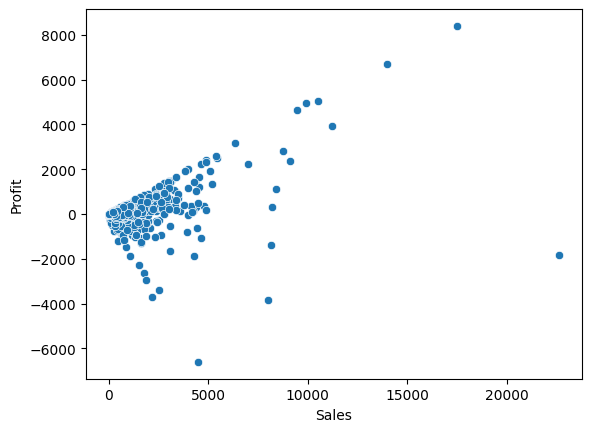

In [63]:
# korelasi Sales vs Profit
sns.scatterplot(data=df, x='Sales', y='Profit');

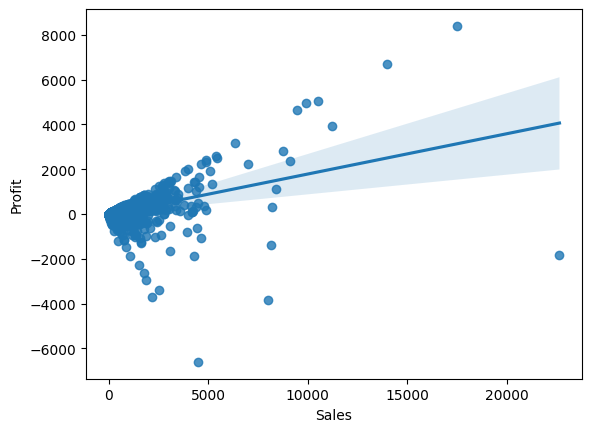

In [64]:
sns.regplot(data=df, x='Sales', y='Profit');

___

## **1. Pearson Correlation** 
Merupakan salah satu ukuran korelasi yang digunakan untuk mengukur kekuatan dan arah hubungan linear dari 2 variabel.

- **Parametric**: data diasumsikan terdistribusi normal
- Hubungannya **linear** (garis lurus)

In [65]:
#menggunakan function dataframe.corr()
df.corr() 

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Row ID,1.000000,0.011644,-0.001359,-0.004016,0.013480,0.012497
Postal Code,0.011644,1.000000,-0.022346,0.013376,0.057243,-0.028751
Sales,-0.001359,-0.022346,1.000000,0.200795,-0.028190,0.479064
Quantity,-0.004016,0.013376,0.200795,1.000000,0.008623,0.066253
Discount,0.013480,0.057243,-0.028190,0.008623,1.000000,-0.219487
Profit,0.012497,-0.028751,0.479064,0.066253,-0.219487,1.000000


In [66]:
#mencari korelasi antar kolom Sales vs Profit
df.corr().loc['Sales', 'Profit'] 

0.479064349737707

In [67]:
# korelasi Sales vs Profit (0.47 --> positive moderate)
df.corr(method='pearson').loc['Sales', 'Profit']

0.479064349737707

In [68]:
df[['Sales', 'Profit']].corr(method='pearson')

,Sales,Profit
Sales,1.000000,0.479064
Profit,0.479064,1.000000


In [69]:
df['Sales'].corr(df['Profit'], method='pearson')

0.4790643497377062

___

## **2. Spearman Correlation**

- Non-Parametric: tidak ada asumsi distribusi datanya
- Hubungannya non-linear (tidak membentuk garis lurus)
- Dapat digunakan untuk data categorical ordinal (bisa diurutkan)

In [70]:
#membuat korelasi method spearman
df[['Sales', 'Profit']].corr(method='spearman')

,Sales,Profit
Sales,1.000000,0.518404
Profit,0.518404,1.000000


In [71]:
df['Sales'].corr(df['Profit'], method='spearman')

0.518403535795707

## Soal: 

- Apakah ada hubungan antara Year dan Mileage?
- Tampilkan dalam scatterplot!
- Bagaimana hubungannya (+/-) dan apakah korelasinya kuat?


## **Simpson's Paradox**
Merupakan sebuah fenomena dalam statistika, dimana tren dari beberapa kelompok data terbalik dari tren gabungan kelompok data keseluruhan.

In [72]:
# berikut ini adalah dataset mengenai tingkat edukasi, tingkat kriminalitas, dan lokasi dari 8 kelurahan.

df_crime = pd.DataFrame({
    'edu':[70,75,80,85,55,58,60,65],
    'crime':[140,120,110,105,50,40,30,25],
    'location':['urban','urban','urban','urban','rural','rural','rural','rural']
})

df_crime

,edu,crime,location
0,70,140,urban
1,75,120,urban
2,80,110,urban
3,85,105,urban
4,55,50,rural
5,58,40,rural
6,60,30,rural
7,65,25,rural


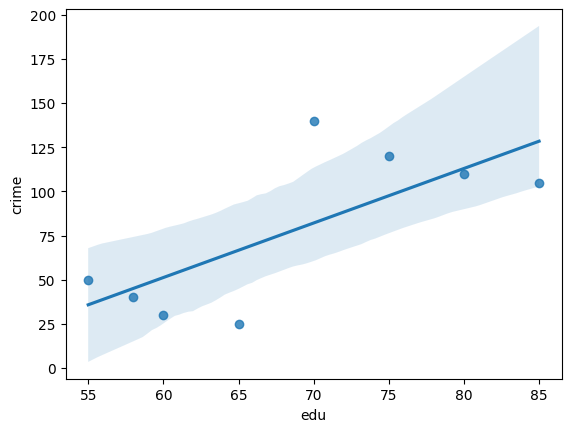

In [73]:
# kalau cuma pakai 2 variable (edu dan crime), korelasinya positif, 
# artinya makin tinggi pendidikan suatu kelurahan, makin tinggi kriminalitasnya

sns.regplot(data=df_crime, x='edu', y='crime');

''

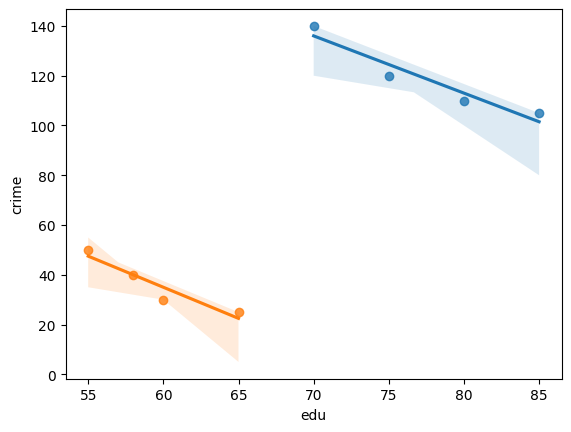

In [74]:
# kalau ditambah variable location (dibedakan lagi berdasarkan location-nya), korelasinya jadi negatif
# artinya makin tinggi pendidikan suatu kelurahan, makin rendah kriminalitasnya

sns.regplot(data=df_crime[df_crime['location']=='urban'], x='edu', y='crime')
sns.regplot(data=df_crime[df_crime['location']=='rural'], x='edu', y='crime')
;
